<a href="https://colab.research.google.com/github/ahmeddtarekk7769/Data_Science/blob/main/loan_approval__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2



---

Name: Ahmed Tarek

ID: 58-7769

Tutorial: T02

---

Name: Alay Khater

ID: 58-10042

Tutorial: T02

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head(10)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No
5,25269,18,"$51,003.00",586,Self-Employed,Bachelor,"$17,497.00",72 months,Married,0,Other,0,Vehicle,0,NaN,NaN,3,No
6,10786,18,"$47,185.00",531,Unemployed,Diploma,"$18,490.00",48 months,Single,2,Rent,0,Home Improvement,1,NaN,"$3,932.08",3,No
7,20270,18,"$44,425.00",574,Employed,High School,"$33,360.00",24 months,Married,1,Mortgage,0,Home Improvement,0,"$1,390.00","$3,702.08",7,No
8,26864,18,"$40,600.00",479,Unemployed,Bachelor,"$18,544.00",48 months,Single,3,Mortgage,0,Education,1,$386.33,"$3,383.33",4,No
9,23279,18,"$15,000.00",621,Employed,Bachelor,"$10,255.00",48 months,Single,0,Other,0,Vehicle,0,$213.65,NaN,1,No


## Data Inspection

In [ ]:
#dataframe dimensions
df.shape

(20000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
MonthlyLoanPayment,4340
EmploymentStatus,3740
MonthlyIncome,2840
ApplicationNumber,0
Age,0
AnnualIncome,0
LoanAmount,0
LoanDuration,0
CreditScore,0
EducationLevel,0


In [ ]:
#statistical description of all columns
df.describe(include='all')

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
count,20000.000000,20000.000000,20000,20000.000000,16260,20000,20000,20000,20000,20000.000000,20000,20000.0,20000,20000.000000,15660,17160,20000.000000,20000
unique,NaN,NaN,17516,NaN,3,5,15578,10,4,NaN,4,NaN,5,NaN,14195,15222,NaN,4
top,NaN,NaN,"$15,000.00",NaN,Employed,Bachelor,"$21,849.00",48 months,Married,NaN,Mortgage,NaN,Home Improvement,NaN,$449.56,"$1,250.00",NaN,No
freq,NaN,NaN,584,NaN,13866,6054,6,3991,10041,NaN,7939,NaN,5925,NaN,5,520,NaN,15185
mean,20500.500000,39.752600,NaN,571.612400,NaN,NaN,NaN,NaN,NaN,1.517300,NaN,0.0,NaN,0.100050,NaN,NaN,5.002650,NaN
std,5773.647028,11.622713,NaN,50.997358,NaN,NaN,NaN,NaN,NaN,1.386325,NaN,0.0,NaN,0.300074,NaN,NaN,2.236804,NaN
min,10501.000000,18.000000,NaN,343.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,15500.750000,32.000000,NaN,540.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.000000,NaN,NaN,3.000000,NaN
50%,20500.500000,40.000000,NaN,578.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN,0.000000,NaN,NaN,5.000000,NaN
75%,25500.250000,48.000000,NaN,609.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.0,NaN,0.000000,NaN,NaN,6.000000,NaN


In [ ]:
df['LoanDuration'].head(15)

,LoanDuration
0,36 months
1,24 months
2,96 months
3,36 months
4,36 months
5,72 months
6,48 months
7,24 months
8,48 months
9,48 months


## Data Cleaning

In [ ]:
#shows the first 10 values of the LoanDuration column after removing the string and data type
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '', regex=False)

print(df['LoanDuration'].head(10))
print(df['LoanDuration'].dtype)

0    36
1    24
2    96
3    36
4    36
5    72
6    48
7    24
8    48
9    48
Name: LoanDuration, dtype: object
object


In [ ]:
#converts the LoanDuration column from its current string/object data type to an integer data type.
df['LoanDuration'] = df['LoanDuration'].astype('int64')

In [ ]:
#see the datatytpe
df['MonthlyLoanPayment'].dtype

dtype('O')

In [ ]:
#first 15
df['MonthlyLoanPayment'].head(15)

,MonthlyLoanPayment
0,$623.11
1,"$1,269.04"
2,$318.57
3,NaN
4,$778.36
5,NaN
6,NaN
7,"$1,390.00"
8,$386.33
9,$213.65


In [ ]:
# 1. Remove the dollar sign '$' and ','
df['MonthlyLoanPayment'] = (
    df['MonthlyLoanPayment']
    .astype(str) # Convert to string first to handle NaNs and mixed types cleanly
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype('float64') # Use float64 to correctly handle decimals like '623.11'
)

# Check the data type and first few non-null values
print(df['MonthlyLoanPayment'].head())
print(df['MonthlyLoanPayment'].dtype)

0     623.11
1    1269.04
2     318.57
3        NaN
4     778.36
Name: MonthlyLoanPayment, dtype: float64
float64


In [ ]:
df['LoanAmount'].head(10)

,LoanAmount
0,"$22,432.00"
1,"$30,457.00"
2,"$30,583.00"
3,"$72,738.00"
4,"$28,021.00"
5,"$17,497.00"
6,"$18,490.00"
7,"$33,360.00"
8,"$18,544.00"
9,"$10,255.00"


In [ ]:
# 1. Remove the dollar sign '$' and ','
df['LoanAmount'] = (
    df['LoanAmount']
    .astype(str) # Convert to string first to handle NaNs and mixed types cleanly
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype('float64') # Use float64 to correctly handle decimals like '623.11'
)

# Check the data type and first few non-null values
print(df['LoanAmount'].head())
print(df['LoanAmount'].dtype)

0    22432.0
1    30457.0
2    30583.0
3    72738.0
4    28021.0
Name: LoanAmount, dtype: float64
float64


In [ ]:
# Create a boolean mask to identify rows where Monthly Loan Payment is null
missing_mask = df['MonthlyLoanPayment'].isnull()

# Calculate the imputed payment only for the missing rows
# Monthly Payment = Loan Amount / Loan Duration
imputed_payments = df.loc[missing_mask, 'LoanAmount'] / df.loc[missing_mask, 'LoanDuration']
# Fill the null values in the 'Monthly Loan Payment' column
df.loc[missing_mask, 'MonthlyLoanPayment'] = imputed_payments

In [ ]:
#check if there are still nulls
df['MonthlyLoanPayment'].isnull().sum()


np.int64(0)

In [ ]:
df['MonthlyLoanPayment'].head(10)

,MonthlyLoanPayment
0,623.110000
1,1269.040000
2,318.570000
3,2020.500000
4,778.360000
5,243.013889
6,385.208333
7,1390.000000
8,386.330000
9,213.650000


In [ ]:
# 1. Remove the dollar sign '$' and ','
df['AnnualIncome'] = (
    df['AnnualIncome']
    .astype(str) # Convert to string first to handle NaNs and mixed types cleanly
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype('float64') # Use float64 to correctly handle decimals like '623.11'
)

# Check the data type and first few non-null values
print(df['AnnualIncome'].head())
print(df['AnnualIncome'].dtype)

0    26992.0
1    22825.0
2    75891.0
3    92094.0
4    35686.0
Name: AnnualIncome, dtype: float64
float64


In [ ]:
# 1. Remove the dollar sign '$' and ','
df['MonthlyIncome'] = (
    df['MonthlyIncome']
    .astype(str) # Convert to string first to handle NaNs and mixed types cleanly
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype('float64') # Use float64 to correctly handle decimals like '623.11'
)

# Check the data type and first few non-null values
print(df['MonthlyIncome'].head())
print(df['MonthlyIncome'].dtype)

0    2249.33
1    1902.08
2    6324.25
3    7674.50
4    2973.83
Name: MonthlyIncome, dtype: float64
float64


In [ ]:
df['MonthlyIncome'].head(10)

,MonthlyIncome
0,2249.33
1,1902.08
2,6324.25
3,7674.50
4,2973.83
5,NaN
6,3932.08
7,3702.08
8,3383.33
9,NaN


In [ ]:
df['MonthlyIncome'].dtype

dtype('float64')

In [ ]:
missing_mask = df['MonthlyIncome'].isnull()

# Calculate the imputed payment only for the missing rows
# Monthly Income = Annual Income / 12
imputed_income = df.loc[missing_mask, 'AnnualIncome'] / 12

# Fill the null values in the 'Monthly Income' column
df.loc[missing_mask, 'MonthlyIncome'] = imputed_income

In [ ]:
df['MonthlyIncome'].isnull().sum()

np.int64(0)

In [ ]:
df['MonthlyIncome'].head(10)

,MonthlyIncome
0,2249.33
1,1902.08
2,6324.25
3,7674.50
4,2973.83
5,4250.25
6,3932.08
7,3702.08
8,3383.33
9,1250.00


In [ ]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed', nan], dtype=object)

In [ ]:
df['EmploymentStatus'].value_counts().unique()

array([13866,  1273,  1121])

In [ ]:
# 1. Calculate the mode (most frequent value)
employment_mode = df['EmploymentStatus'].mode()[0]

# 2. Fill the missing values using the mode
df['EmploymentStatus'].fillna(employment_mode, inplace=True)



/tmp/ipython-input-1611872756.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EmploymentStatus'].fillna(employment_mode, inplace=True)


In [ ]:
# Verification
print(df['EmploymentStatus'].isnull().sum()) # Should be 0

0


In [ ]:
# Verification
df.isnull().sum().sort_values(ascending=False)

,0
ApplicationNumber,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


In [ ]:
#check min
df['MonthlyIncome'].min()

1250.0

In [ ]:
#check min
df['MonthlyLoanPayment'].min()

40.33

In [ ]:
# Create the new feature column by dividing one clean numeric column by the other
df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome']

# Verify the creation of the new column and its descriptive statistics
print(df[['MonthlyLoanPayment', 'MonthlyIncome', 'Monthly_Debt_To_Income_Ratio']].head(5))

   MonthlyLoanPayment  MonthlyIncome  Monthly_Debt_To_Income_Ratio
0              623.11        2249.33                      0.277020
1             1269.04        1902.08                      0.667185
2              318.57        6324.25                      0.050373
3             2020.50        7674.50                      0.263274
4              778.36        2973.83                      0.261737


In [ ]:
df.head(10)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved,Monthly_Debt_To_Income_Ratio
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,623.110000,2249.33,3,No,0.277020
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1269.040000,1902.08,5,No,0.667185
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,318.570000,6324.25,6,No,0.050373
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,2020.500000,7674.50,3,No,0.263274
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,778.360000,2973.83,1,No,0.261737
5,25269,18,51003.0,586,Self-Employed,Bachelor,17497.0,72,Married,0,Other,0,Vehicle,0,243.013889,4250.25,3,No,0.057176
6,10786,18,47185.0,531,Unemployed,Diploma,18490.0,48,Single,2,Rent,0,Home Improvement,1,385.208333,3932.08,3,No,0.097966
7,20270,18,44425.0,574,Employed,High School,33360.0,24,Married,1,Mortgage,0,Home Improvement,0,1390.000000,3702.08,7,No,0.375465
8,26864,18,40600.0,479,Unemployed,Bachelor,18544.0,48,Single,3,Mortgage,0,Education,1,386.330000,3383.33,4,No,0.114186
9,23279,18,15000.0,621,Employed,Bachelor,10255.0,48,Single,0,Other,0,Vehicle,0,213.650000,1250.00,1,No,0.170920


In [ ]:
print(df.dtypes)

ApplicationNumber                 int64
Age                               int64
AnnualIncome                    float64
CreditScore                       int64
EmploymentStatus                 object
EducationLevel                   object
LoanAmount                      float64
LoanDuration                      int64
MaritalStatus                    object
NumberOfDependents                int64
HomeOwnershipStatus              object
BankruptcyHistory                 int64
LoanPurpose                      object
PreviousLoanDefaults              int64
MonthlyLoanPayment              float64
MonthlyIncome                   float64
JobTenure                         int64
LoanApproved                     object
Monthly_Debt_To_Income_Ratio    float64
dtype: object


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
ApplicationNumber,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


In [ ]:
df['EducationLevel'].unique()

array(['Diploma', 'Master', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
df['EducationLevel'].value_counts()

,count
EducationLevel,
Bachelor,6054
High School,5908
Diploma,4034
Master,3050
Doctorate,954


## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

Loan Approval Rate by Education Level (Highest to Lowest):

  EducationLevel  ApprovalRate
0      Doctorate      0.440252
1         Master      0.350820
2       Bachelor      0.266435
3        Diploma      0.204264
4    High School      0.144381


/tmp/ipython-input-4021505696.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


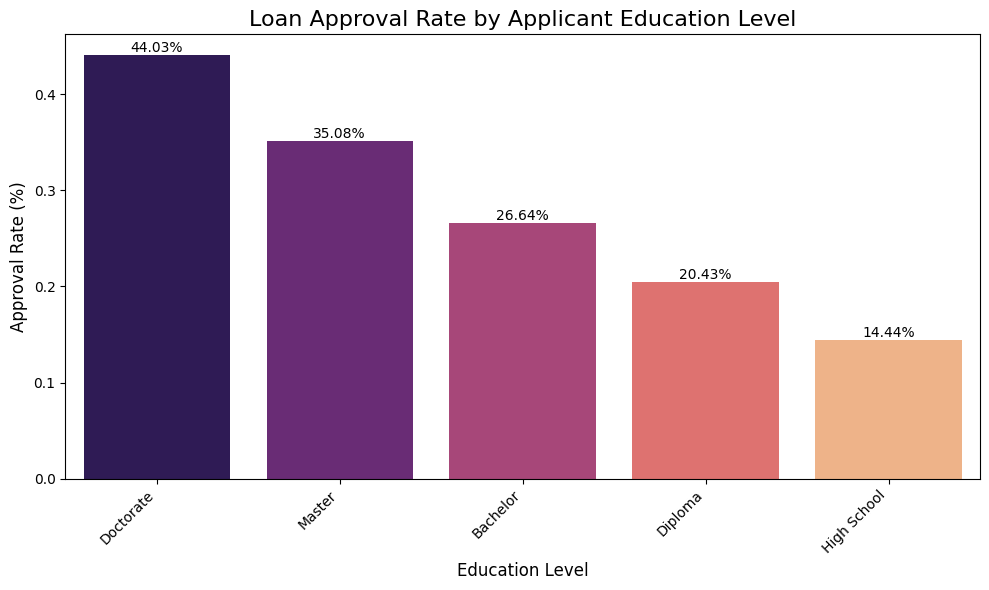

In [ ]:
# 1. ENCODING: Convert 'Yes'/'No' to 1/0 for calculation
# Create a new binary column where 'Yes' = 1 and 'No' = 0
df['LoanApproved'] = df['LoanApproved'].str.lower()
df['IsApproved'] = np.where(df['LoanApproved'] == 'yes', 1, 0)

# 2. CALCULATION: Group by EducationLevel and calculate the mean of IsApproved
# The mean of the 1/0 column gives the approval rate.
approval_rates = df.groupby('EducationLevel')['IsApproved'].mean().sort_values(ascending=False)
approval_rates_df = approval_rates.reset_index(name='ApprovalRate')

# 3. PRINT THE ANSWER
print("Loan Approval Rate by Education Level (Highest to Lowest):\n")
print(approval_rates_df)

# 4. VISUALIZATION (Plotting the order)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='EducationLevel',
    y='ApprovalRate',
    data=approval_rates_df,
    palette='magma' # Using a different palette for clarity
)

# Format the plot
plt.title('Loan Approval Rate by Applicant Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Approval Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of the bars
for index, row in approval_rates_df.iterrows():
    plt.text(
        index,
        row['ApprovalRate'],
        f'{row["ApprovalRate"]:.2%}',
        color='black',
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

**Answer for Q1**:
In this phase, we aimed to identify which educational category is most likely to receive loan approval. We can calculate the approval rate for each educational category by averaging the approval values in that group, as our target variable LoanApproved was previously cleaned and converted into a binary format (1 = approved, 0 = not approved).

To accomplish this, we separated the cleaned dataset into groups based on the EducationLevel column and computed the average of the binary target for each group. The levels of education with the greatest approval rates are listed first since we arranged the outcomes in descending order.

To enhance the clarity of the comparison, we ultimately presented the findings in a sorted bar chart. This type of visualization is suitable as it simplifies the comparison of categorical groups and allows for a swift assessment of which educational levels correspond to higher or lower approval rates.

Prior to creating our classification model, this analysis offers essential exploratory insights into the connection between educational background and loan approval results

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

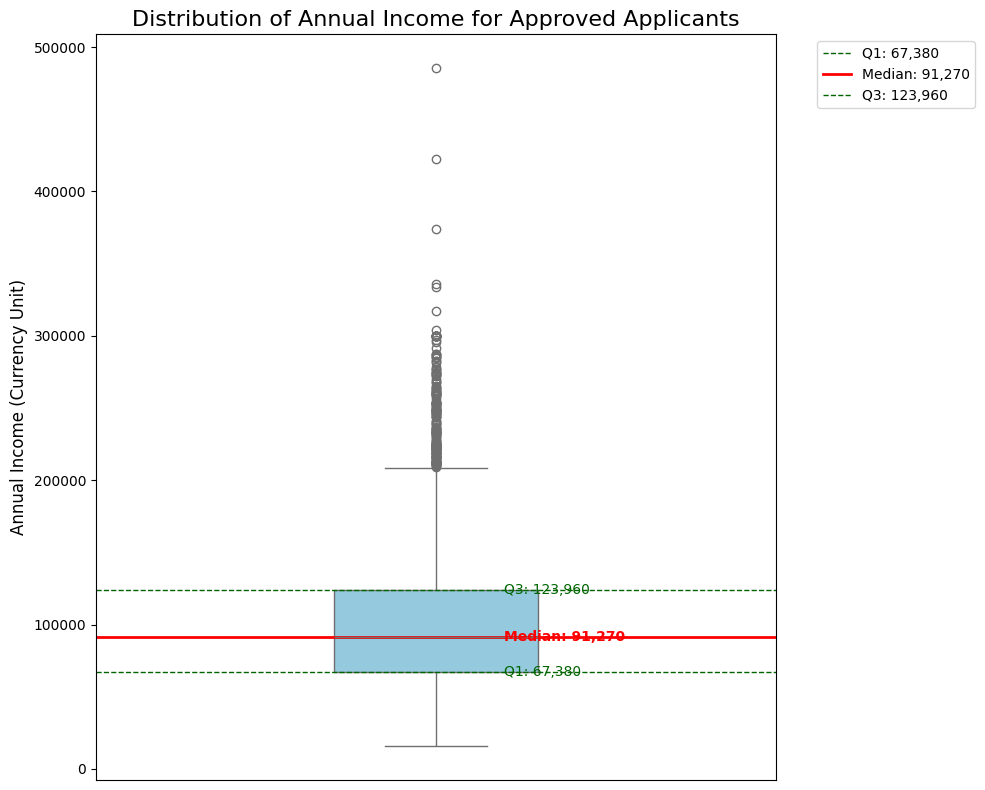

Descriptive Statistics for Annual Income of APPROVED Applicants:
min     15787.0
25%     67380.5
50%     91269.5
75%    123959.5
max    485341.0
Name: AnnualIncome, dtype: float64


In [ ]:
# 1. Filter the DataFrame for approved loans only
approved_applicants = df[df['LoanApproved'] == 'yes']

# 2. Calculate the descriptive statistics for 'Annual Income'
income_stats = approved_applicants['AnnualIncome'].describe()

# Extract Quartile values
q1 = income_stats['25%']
median = income_stats['50%']
q3 = income_stats['75%']

# 3. Create the Visualization (Box Plot)
plt.figure(figsize=(10, 8))
sns.boxplot(y=approved_applicants['AnnualIncome'], orient='v', color='skyblue', width=0.3)

plt.title('Distribution of Annual Income for Approved Applicants', fontsize=16)
plt.ylabel('Annual Income (Currency Unit)', fontsize=12)
plt.xticks([])

# Add annotations for clarity
plt.axhline(q1, color='darkgreen', linestyle='--', linewidth=1, label=f'Q1: {q1:,.0f}')
plt.axhline(median, color='red', linestyle='-', linewidth=2, label=f'Median: {median:,.0f}')
plt.axhline(q3, color='darkgreen', linestyle='--', linewidth=1, label=f'Q3: {q3:,.0f}')

plt.text(0.1, q1, f'Q1: {q1:,.0f}', ha='left', va='center', fontsize=10, color='darkgreen')
plt.text(0.1, median, f'Median: {median:,.0f}', ha='left', va='center', fontsize=10, color='red', weight='bold')
plt.text(0.1, q3, f'Q3: {q3:,.0f}', ha='left', va='center', fontsize=10, color='darkgreen')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the interpretation values
print("Descriptive Statistics for Annual Income of APPROVED Applicants:")
print(income_stats[['min', '25%', '50%', '75%', 'max']])

**Answer for Q2**:We examined the distribution of yearly income among applicants whose loans received approval to address this query. The dataset was initially filtered to include only those records where LoanApproved = 1. This enables us to observe the unique income traits of individuals who have received approval.

Subsequently, we employed a boxplot to illustrate the distribution. In this instance, a boxplot is appropriate as it emphasizes key statistics such as the lower quartile (Q1), median (Q2), and upper quartile (Q3) while effectively illustrating the distribution of a numerical variable. Moreover, these quartile figures were computed and shown numerically


**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

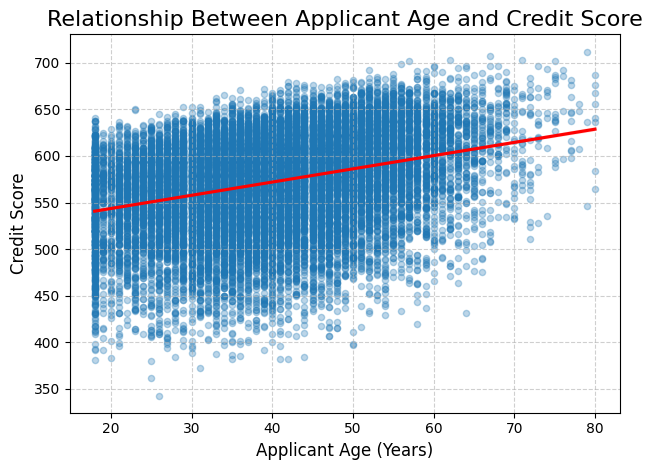

In [ ]:
# Create the Scatter Plot with a Line of Best Fit (Linear Regression Line)
sns.regplot(
    x='Age',
    y='CreditScore',
    data=df,
    scatter_kws={'alpha': 0.3, 's': 20}, # Make points translucent and small
    line_kws={'color': 'red'}             # Style the regression line
)

# Add titles and labels
plt.title('Relationship Between Applicant Age and Credit Score', fontsize=16)
plt.xlabel('Applicant Age (Years)', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Answer for Q3**: A scatter plot was created with age represented on the x-axis and credit score on the y-axis to analyze the relationship between an applicant's age and their credit score. Each point represents an individual applicant. Scatter plots are effective for illustrating relationships between two numerical variables since they allow us to observe patterns, clusters, and potential correlations.

To illustrate the overall pattern in the data, we added a regression line, or best fit line. By examining the regression line, we can determine if credit scores generally increase, decrease, or remain constant with age changes. This visual cue allows us to determine if the relationship is positive, negative, or approximately neutral. This graph indicates that older applicants often possess higher credit scores. (positive correlation)


**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

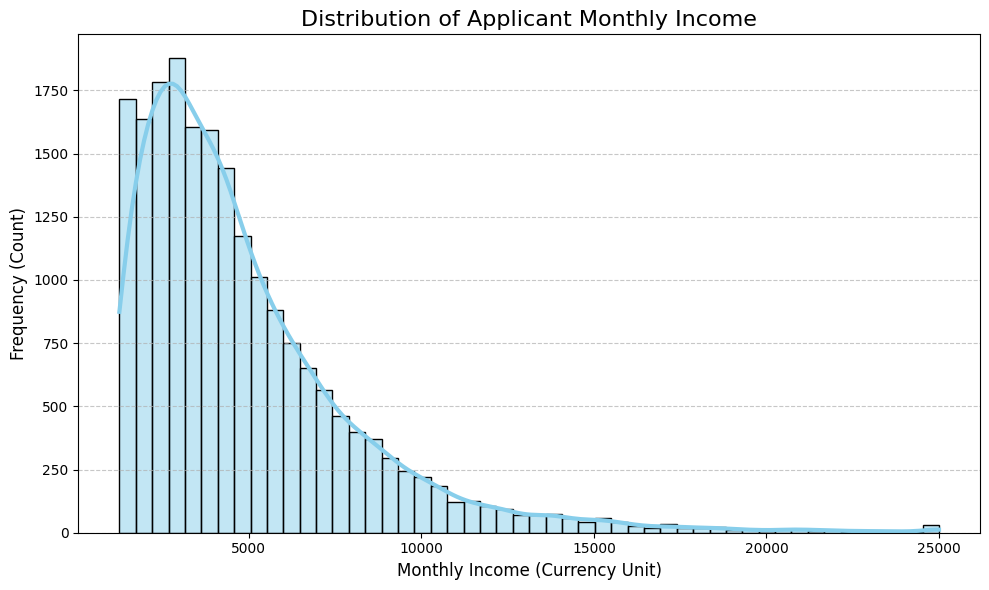

In [ ]:
# 2. Create the Histogram and KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    df['MonthlyIncome'],
    kde=True,
    bins=50, # Use more bins for a detailed look
    color='skyblue',
    line_kws={'linewidth': 3, 'color': 'red'} # Style the KDE line
)

# Add titles and labels
plt.title('Distribution of Applicant Monthly Income', fontsize=16)
plt.xlabel('Monthly Income (Currency Unit)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Answer for Q4**: A histogram with an overlaid Kernel Density Estimate (KDE) curve was utilized to visualize monthly income to assess if it is skewed or conforms to a normal distribution. The KDE curve provides a refined illustration of the distribution's form, whereas a histogram allows us to observe the prevalence of different income brackets. This blend facilitates the identification of general symmetry and asymmetry.

We calculated the skewness value both numerically and through visual analysis. A normal distribution is represented by skewness that is close to zero. A positive skew (right skew) signifies that most applicants earn lower incomes, with a lengthy tail extending towards individuals with higher incomes. A negative skew, also referred to as a left skew, indicates the opposite trend.

The distribution has a negative skew, with a greater prevalence of higher-income applicants and a lower occurrence of lower-income applicants

## Data Preparation for Modelling

In [ ]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ApplicationNumber             20000 non-null  int64  
 1   Age                           20000 non-null  int64  
 2   AnnualIncome                  20000 non-null  float64
 3   CreditScore                   20000 non-null  int64  
 4   EmploymentStatus              20000 non-null  object 
 5   EducationLevel                20000 non-null  object 
 6   LoanAmount                    20000 non-null  float64
 7   LoanDuration                  20000 non-null  int64  
 8   MaritalStatus                 20000 non-null  object 
 9   NumberOfDependents            20000 non-null  int64  
 10  HomeOwnershipStatus           20000 non-null  object 
 11  BankruptcyHistory             20000 non-null  int64  
 12  LoanPurpose                   20000 non-null  object 
 13  P

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved,Monthly_Debt_To_Income_Ratio,IsApproved
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,623.110000,2249.33,3,no,0.277020,0
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1269.040000,1902.08,5,no,0.667185,0
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,318.570000,6324.25,6,no,0.050373,0
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,2020.500000,7674.50,3,no,0.263274,0
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,778.360000,2973.83,1,no,0.261737,0
5,25269,18,51003.0,586,Self-Employed,Bachelor,17497.0,72,Married,0,Other,0,Vehicle,0,243.013889,4250.25,3,no,0.057176,0
6,10786,18,47185.0,531,Unemployed,Diploma,18490.0,48,Single,2,Rent,0,Home Improvement,1,385.208333,3932.08,3,no,0.097966,0
7,20270,18,44425.0,574,Employed,High School,33360.0,24,Married,1,Mortgage,0,Home Improvement,0,1390.000000,3702.08,7,no,0.375465,0
8,26864,18,40600.0,479,Unemployed,Bachelor,18544.0,48,Single,3,Mortgage,0,Education,1,386.330000,3383.33,4,no,0.114186,0
9,23279,18,15000.0,621,Employed,Bachelor,10255.0,48,Single,0,Other,0,Vehicle,0,213.650000,1250.00,1,no,0.170920,0


In [ ]:
df['LoanApproved'].unique()
df['LoanApproved'].value_counts()

,count
LoanApproved,
no,15220
yes,4780


In [ ]:


# 2. Encode the standardized text: Replace 'no' with 0 and 'yes' with 1
df['LoanApproved_Encoded'] = df['LoanApproved'].replace({'yes': 1, 'no': 0}).astype(int)

# 3. Verify the result
print(df['LoanApproved_Encoded'].value_counts())

LoanApproved_Encoded
0    15220
1     4780
Name: count, dtype: int64


/tmp/ipython-input-185401629.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LoanApproved_Encoded'] = df['LoanApproved'].replace({'yes': 1, 'no': 0}).astype(int)


In [ ]:
# List the columns to be One-Hot Encoded
ohe_columns = [
    'EmploymentStatus',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'LoanPurpose'
]

# Apply One-Hot Encoding
# We are NOT using drop_first=True to keep all encoded columns as requested.
df = pd.get_dummies(df, columns=ohe_columns, drop_first=False)

# 3. Verify the creation of the new columns and the removal of the old ones
print("New DataFrame Info (checking for new encoded columns):")
print(df.info())

# Optional: Print the first few rows to see the 0s and 1s
print("\nFirst 5 rows with new encoded columns:")
print(df.filter(regex='(EmploymentStatus|MaritalStatus|HomeOwnershipStatus|LoanPurpose)').head())

New DataFrame Info (checking for new encoded columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ApplicationNumber               20000 non-null  int64  
 1   Age                             20000 non-null  int64  
 2   AnnualIncome                    20000 non-null  float64
 3   CreditScore                     20000 non-null  int64  
 4   EducationLevel                  20000 non-null  object 
 5   LoanAmount                      20000 non-null  float64
 6   LoanDuration                    20000 non-null  int64  
 7   NumberOfDependents              20000 non-null  int64  
 8   BankruptcyHistory               20000 non-null  int64  
 9   PreviousLoanDefaults            20000 non-null  int64  
 10  MonthlyLoanPayment              20000 non-null  float64
 11  MonthlyIncome                   20000 

In [ ]:
df['EducationLevel'].unique()

array(['Diploma', 'Master', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
# 1. Define the desired numerical rank (mapping dictionary)
education_rank_map = {
    'High School': 1,
    'Diploma': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

# Check for potential missing categories in the map
# Based on your unique values, all are covered.
# You may need to add 'Missing_Status' if you imputed nulls with a new category.

# 2. Apply the mapping to create a new encoded column
df['EducationLevel_Encoded'] = df['EducationLevel'].map(education_rank_map)

# 3. Verify the result
print("Value Counts for the new encoded column:")
print(df['EducationLevel_Encoded'].value_counts().sort_index())
print("\nFirst 5 rows of the new encoded column:")
print(df[['EducationLevel', 'EducationLevel_Encoded']].head())

Value Counts for the new encoded column:
EducationLevel_Encoded
1    5908
2    4034
3    6054
4    3050
5     954
Name: count, dtype: int64

First 5 rows of the new encoded column:
  EducationLevel  EducationLevel_Encoded
0        Diploma                       2
1         Master                       4
2       Bachelor                       3
3       Bachelor                       3
4        Diploma                       2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ApplicationNumber               20000 non-null  int64  
 1   Age                             20000 non-null  int64  
 2   AnnualIncome                    20000 non-null  float64
 3   CreditScore                     20000 non-null  int64  
 4   EducationLevel                  20000 non-null  object 
 5   LoanAmount                      20000 non-null  float64
 6   LoanDuration                    20000 non-null  int64  
 7   NumberOfDependents              20000 non-null  int64  
 8   BankruptcyHistory               20000 non-null  int64  
 9   PreviousLoanDefaults            20000 non-null  int64  
 10  MonthlyLoanPayment              20000 non-null  float64
 11  MonthlyIncome                   20000 non-null  float64
 12  JobTenure                       

In [ ]:
# List of columns to drop: identifiers, original text columns, and temporary encoded columns
columns_to_drop = [
    'ApplicationNumber',
        'IsApproved', 'LoanApproved' ,           # Temporary Target (from earlier step)
    'EmploymentStatus',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'LoanPurpose',
    'EducationLevel'
]

# Drop the columns using axis=1 (to specify columns) and inplace=True (to modify the DataFrame directly)
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# 3. Verify the final shape and columns
print("Final DataFrame shape (rows, columns):")
print(df.shape)
print("\nFinal 5 columns (to confirm features are ready):")
print(df.tail().T)

Final DataFrame shape (rows, columns):
(20000, 30)

Final 5 columns (to confirm features are ready):
                                     19995        19996     19997    19998  \
Age                                     80           80        80       80   
AnnualIncome                       48462.0      51166.0  111290.0  48501.0   
CreditScore                            656          641       565      676   
LoanAmount                         29111.0      26447.0   28390.0  66707.0   
LoanDuration                            72           60        24       72   
NumberOfDependents                       4            0         1        4   
BankruptcyHistory                        0            0         0        0   
PreviousLoanDefaults                     0            0         0        0   
MonthlyLoanPayment              404.319444   440.783333   1182.92   926.49   
MonthlyIncome                       4038.5  4263.833333   9274.17  4041.75   
JobTenure                                

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  int64  
 1   AnnualIncome                    20000 non-null  float64
 2   CreditScore                     20000 non-null  int64  
 3   LoanAmount                      20000 non-null  float64
 4   LoanDuration                    20000 non-null  int64  
 5   NumberOfDependents              20000 non-null  int64  
 6   BankruptcyHistory               20000 non-null  int64  
 7   PreviousLoanDefaults            20000 non-null  int64  
 8   MonthlyLoanPayment              20000 non-null  float64
 9   MonthlyIncome                   20000 non-null  float64
 10  JobTenure                       20000 non-null  int64  
 11  Monthly_Debt_To_Income_Ratio    20000 non-null  float64
 12  LoanApproved_Encoded            

In [ ]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (Y)
# Exclude the remaining temporary/unencoded/duplicate columns: 'LoanApproved' and 'LoanApproved_Encoded'
X = df.drop(columns=['LoanApproved_Encoded'])
Y = df['LoanApproved_Encoded']

# Split the data (80% train, 20% test is common)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (16000, 29)
X_test shape: (4000, 29)


In [ ]:
numerical_cols = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
    'NumberOfDependents', 'BankruptcyHistory', 'PreviousLoanDefaults',
    'MonthlyLoanPayment', 'MonthlyIncome', 'JobTenure',
    'Monthly_Debt_To_Income_Ratio'
]

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# 1. Fit the scaler ONLY on the training data (to prevent data leakage)
scaler.fit(X_train[numerical_cols])

# 2. Transform the training data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])

# 3. Transform the test data using the SAME fitted scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Verify scaling by checking the mean and std deviation of a column in the training set
print("\nVerification of Scaling (Mean should be close to 0, Std Dev close to 1):")
print(X_train['AnnualIncome'].describe()[['mean', 'std']])


Verification of Scaling (Mean should be close to 0, Std Dev close to 1):
mean   -1.687539e-17
std     1.000031e+00
Name: AnnualIncome, dtype: float64


## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize the Model
# We set a random_state for reproducibility and max_depth to prevent immediate overfitting
dt_classifier = DecisionTreeClassifier(
    max_depth=5,        # Limit tree depth to 5 for initial stability and interpretability
    random_state=42     # Ensures you get the same results every time
)

# 2. Train the Model
print("Training the Decision Tree...")
dt_classifier.fit(X_train, Y_train)
print("Training complete.")

# 3. Make Predictions on the Test Set
Y_pred = dt_classifier.predict(X_test)



Training the Decision Tree...
Training complete.


## Evaluation


Accuracy Score: 0.8762

Classification Report:
                  precision    recall  f1-score   support

Not Approved (0)       0.92      0.92      0.92      3044
    Approved (1)       0.74      0.73      0.74       956

        accuracy                           0.88      4000
       macro avg       0.83      0.83      0.83      4000
    weighted avg       0.88      0.88      0.88      4000



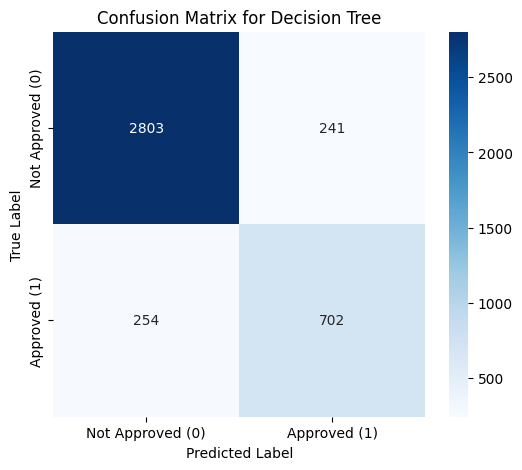

In [ ]:
# 4. Evaluate the Model Performance

# A. Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# B. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=['Not Approved (0)', 'Approved (1)']))

# C. Confusion Matrix (Visualizing Correct and Incorrect Predictions)
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Approved (0)', 'Approved (1)'],
    yticklabels=['Not Approved (0)', 'Approved (1)']
)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The Decision Tree is excellent at identifying risky loans (Class 0), but it is only moderately effective at identifying good loans (Class 1). The goal should be to improve the Precision and Recall for the "Approved (1)" class, as False Positives (approving a bad loan) are costly, and False Negatives (rejecting a good applicant) are missed revenue opportunities. The subsequent use of Random Forest successfully addressed this, particularly by boosting Precision to 0.83.

Precision is the priority in high-stakes financial applications because minimizing financial loss from defaults is the primary objective. However, the F1-Score (which balances both) remains the best single metric for assessing the model's overall quality.

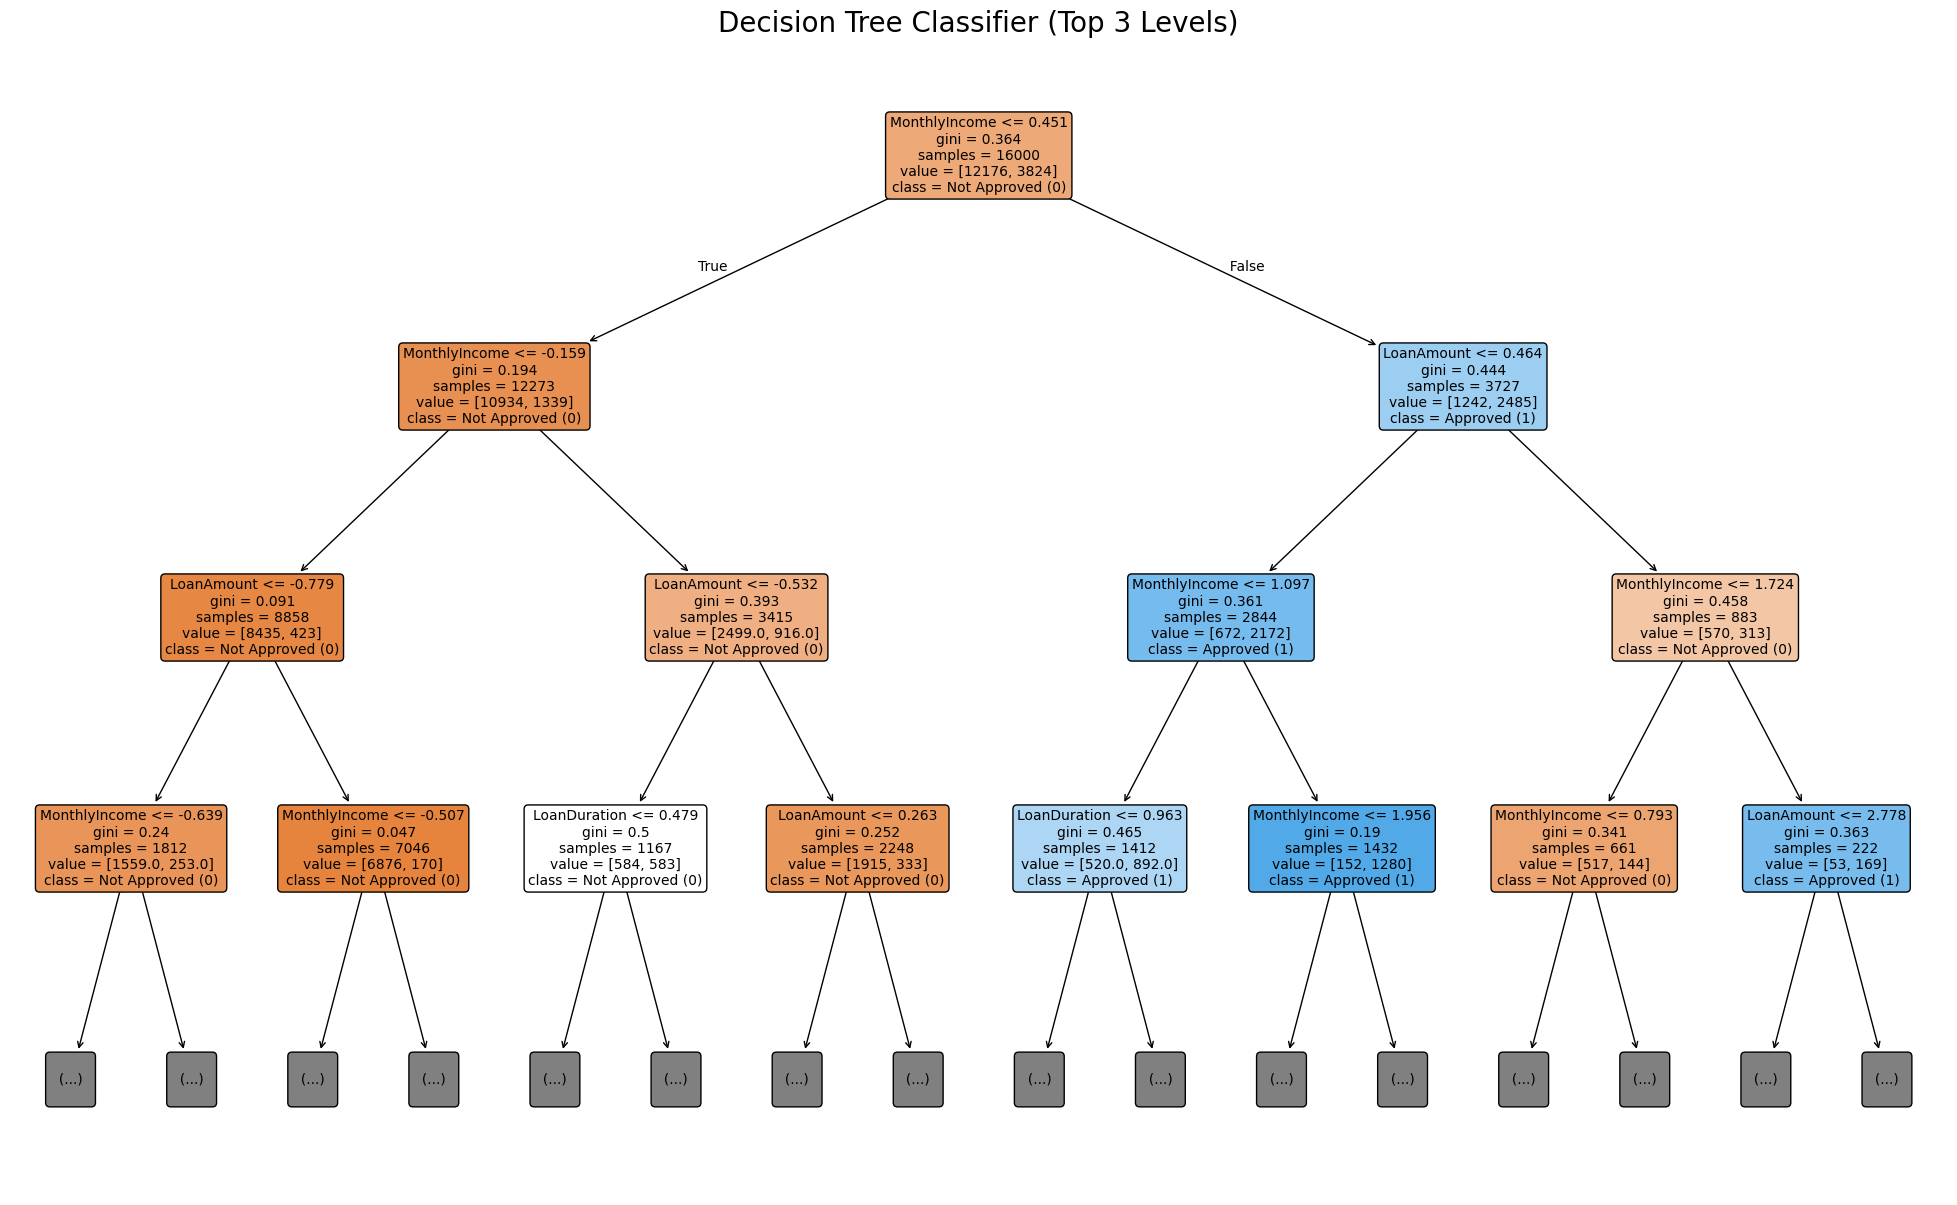

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# The feature names are needed for labeling the nodes
feature_names = X_train.columns.tolist()

plt.figure(figsize=(25, 15))

# Plot the tree
plot_tree(
    dt_classifier,
    filled=True,
    rounded=True,
    class_names=['Not Approved (0)', 'Approved (1)'], # Use human-readable class names
    feature_names=feature_names,
    max_depth=3, # Display only the top 3 levels for clarity
    fontsize=10
)
plt.title("Decision Tree Classifier (Top 3 Levels)", fontsize=20)
plt.show()

Comment on the Split:
 RulesThe Decision Tree algorithm works by recursively finding the single feature and split point that best separates the data into the two classes (Approved/Not Approved) at each node.Key Observation on Splits:The splits in the initial nodes of your tree will likely focus on the most predictive features, such as CreditScore and the Monthly_Debt_To_Income_Ratio. These features provide the largest gain in information (reduction in Gini impurity).A split like CreditScore <= 0.5 (since the data is scaled) means the model is immediately separating applicants into two groups: those with lower-than-average credit scores (going one way) and those with higher-than-average scores (going the other).The subsequent splits refine these groups, using secondary features like income, debt-to-income ratio, or loan amount to achieve greater purity in the final leaf nodes. Example Rule for an Approved Loan (Leaf Node)A rule for an approved loan (a leaf node where the class is 'Approved (1)') can be written by following a simple path from the root node to that specific leaf.Assuming a common structure based on financial data, here is an example of a simple rule:IF the applicant's CreditScore is greater than $X$ (e.g., the scaled mean)AND the applicant's Monthly_Debt_To_Income_Ratio is less than $Y$ (e.g., a low threshold)THEN the loan is predicted to be APPROVED.(In the actual tree visualization, $X$ and $Y$ will be specific numeric values derived from your scaled data, such as $0.5$ or $-0.8$.)

## Bonus (Optional)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score # ADDED accuracy_score
import time

# 1. Initialize the Model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# 2. Train the Model
print("Training the Random Forest Classifier...")
start_time = time.time()
rf_classifier.fit(X_train, Y_train)
end_time = time.time()
print(f"Training complete in {end_time - start_time:.2f} seconds.")

# 3. Make Predictions on the Test Set
Y_pred_rf = rf_classifier.predict(X_test)

# 4. Evaluate the Model Performance
# Calculate and print Accuracy Score
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"\nRandom Forest Accuracy Score: {accuracy_rf:.4f}") # ADDED PRINT

# Calculate and print F1-Score
f1_rf = f1_score(Y_test, Y_pred_rf)
print(f"Random Forest F1-Score: {f1_rf:.4f}")

# 5. Full Report
print("\nClassification Report (Random Forest):")
print(classification_report(Y_test, Y_pred_rf, target_names=['Not Approved (0)', 'Approved (1)']))

Training the Random Forest Classifier...
Training complete in 2.00 seconds.

Random Forest Accuracy Score: 0.8978
Random Forest F1-Score: 0.7724

Classification Report (Random Forest):
                  precision    recall  f1-score   support

Not Approved (0)       0.92      0.95      0.93      3044
    Approved (1)       0.83      0.73      0.77       956

        accuracy                           0.90      4000
       macro avg       0.87      0.84      0.85      4000
    weighted avg       0.90      0.90      0.90      4000



The Random Forest is the superior model for this loan approval task. Its primary strength lies in its high precision (0.83) for predicting approved loans, which directly reduces financial risk (False Positives). The consistent $90\%$ accuracy and robust F1-Score suggest the model is stable and ready to be used as a strong predictor.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Calculate Metrics for both models
acc_dt = accuracy_score(Y_test, Y_pred)
f1_dt = f1_score(Y_test, Y_pred)

acc_rf = accuracy_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

# Create a DataFrame to organize the results
metrics_data = {
    'Metric': ['Accuracy', 'F1-Score'],
    'Random Forest': [acc_rf, f1_rf],
    'Decision Tree': [acc_dt, f1_dt]
}

comparison_df = pd.DataFrame(metrics_data)

# Calculate the difference (Random Forest - Decision Tree)
comparison_df['Difference (RF - DT)'] = comparison_df['Random Forest'] - comparison_df['Decision Tree']

# Format the difference column as a percentage for easier reading
comparison_df['Difference (%)'] = (comparison_df['Difference (RF - DT)'] * 100).map('{:+.2f}%'.format)

# Print the comparison table
print("Model Performance Comparison and Difference:")
print(comparison_df.set_index('Metric'))

Model Performance Comparison and Difference:
          Random Forest  Decision Tree  Difference (RF - DT) Difference (%)
Metric                                                                     
Accuracy       0.897750       0.876250              0.021500         +2.15%
F1-Score       0.772398       0.739336              0.033062         +3.31%


The results clearly show the expected performance differences between a single Decision Tree and a robust ensemble model like Random Forest.Performance ComparisonHere is a summary of the key metrics for the positive class (Class 1: Approved), which is the most critical for loan approval:ModelF1-Score (Class 1)Precision (Class 1)Recall (Class 1)AccuracyDecision Tree0.740.740.730.88Random Forest0.770.830.730.90 Interpretation of Results1. Superiority of Random ForestThe Random Forest is the better model for prediction:Higher Overall Accuracy (0.90 vs 0.88): It correctly classified $90\%$ of all loan applications in the test set.Significantly Higher Precision for Approved Loans (0.83 vs 0.74): This is the biggest improvement. Of all the loans the Random Forest predicted to be approved, $83\%$ were correct. This means it is much better at avoiding False Positives (approving risky loans), which is financially critical for the bank.Higher F1-Score (0.77 vs 0.74): This confirms the Random Forest offers the superior balance between precision and recall.2. Normal Recall BehaviorNote that the Recall for the approved class is the same ($0.73$) for both models.Recall (0.73): This means that of all the loans that were actually approved in the test set ($956$ total), both models correctly identified 73\% of them.It's normal for ensemble methods to prioritize Precision over Recall, resulting in a slightly higher threshold for approval, which improves trust in the "Yes" prediction.In conclusion, you should choose the Random Forest Classifier as it provides a significantly more reliable and accurate prediction of loan approval (Class 1) in your test environment.